<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

Daniel Vidal Soroa  
Juan Diego Peña 

## Clasificación de mangos en tres clases según su presencia para la exportación, comercio local o procesamiento industrial

#### Importación de las librerías:

In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, classification_report, multilabel_confusion_matrix,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
from random import seed
from random import randint
from tensorflow import keras
from keras import layers, models, utils, datasets
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from sklearn.utils import shuffle

#### Lectura de los datos:

In [28]:
IMG_SIZE = 32

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical")
])

# seed random number generator
seed(1)

# Dimensión de entrada de las imágenes 
h = IMG_SIZE
w = IMG_SIZE


# Leer los nombres de las imágenes para importarlas
input_class1_path = "./Dataset/Grading_dataset/Class_I"
class1_names = os.listdir(input_class1_path)
input_class2_path = "./Dataset/Grading_dataset/Class_II"
class2_names = os.listdir(input_class2_path)
input_classex_path = "./Dataset/Grading_dataset/Extra_Class"
class3_names = os.listdir(input_classex_path)

# Número de elementos en cada clase
n = len(class1_names)


# Definir listas para cargar imágenes
class1 = np.ones([n, h, w, 3])
class2 = np.ones([n, h, w, 3])
class3 = np.ones([n, h, w, 3])
t1=np.zeros(n)
t2=np.ones(n)
t3=np.ones(n) +1




for i in range(0, n, 1):
    # Para cada clase, se lee una imágen, se importa
    img = resize(imread("./Dataset/Grading_dataset/Class_I/" + class1_names[i]), (h, w))
    class1[i] = img
     
    img = resize(imread("./Dataset/Grading_dataset/Class_II/" + class2_names[i]), (h, w))
    class2[i] = img
    
    img = resize(imread("./Dataset/Grading_dataset/Extra_Class/" + class3_names[i]), (h, w))
    class3[i] = img
     
class1,class2,class3 = shuffle(class1,class2,class3)
X = np.zeros([n*3,h*w*3])
t = np.zeros(n*3)
X[0:200] = class3[0:200].reshape((n,h*w*3))
X[200:400] = class1[0:200].reshape(n,h*w*3)
X[400:600] = class2[0:200].reshape(n,h*w*3)
t[0:200] = t1
t[200:400] = t2 
t[400:600] = t3
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.33, random_state=42) 




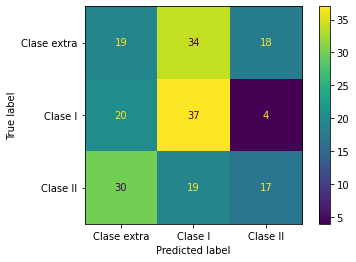

In [29]:
clustering = SpectralClustering(n_clusters=3,eigen_solver="arpack",affinity="nearest_neighbors")
clustering.fit(X_train)
y_pred =clustering.fit_predict(X_test)
Clases=['Clase extra','Clase I','Clase II']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Clases)
disp.plot()


#### Se muestra la matriz de confusión para conocer el desempeño del algoritmo

In [42]:
test_data = {'base model':model_name,
        'algorithm': 'KMeans',
        'accuracy': accuracy,
        'eval time': eval_time
        }

now = datetime.now() # current date and time       
time_ = {now.strftime("%d/%m/%Y %H:%M:%S")}
df = pd.DataFrame(test_data, index = time_)
excel_name = "./informe/tables/Clustering.xlsx"
append_data_to_excel(excel_name, df)

#### Se crea una carpeta para guardar cada clase

In [18]:
# Made folder to seperate images
clusterI_path = "./Dataset/Grading_dataset/cluster I"
clusterII_path = "./Dataset/Grading_dataset/cluster II"
clusterIII_path = "./Dataset/Grading_dataset/cluster III"
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.copy(os.path.join(input_cluster_path, image_cluster['image'][i]), clusterI_path)
    elif image_cluster['clusterid'][i]==1:
        shutil.copy(os.path.join(input_cluster_path, image_cluster['image'][i]), clusterII_path)
    else:
        shutil.copy(os.path.join(input_cluster_path, image_cluster['image'][i]), clusterIII_path)